In [22]:
options(jupyter.rich_display = FALSE)

Making decisions
===========

* The `if` statement executes a block of code if a condition is `TRUE`.
* _Conditional execution_: Common in all programming languages.
* General structure:


    if(<condition>) {
        <statements 1>
    } else {
        <statements 2>
    }
* The value of the last statement in the executed block is returned.

The if statement
=========

* Users enter their grade to ask about whether they passed the course.
* If the grade is greater than 50, the student passes the course.

In [2]:
x <- as.integer(readline(prompt = "Enter your grade: "))
if(x>50)
    "Passed!"

In [3]:
x <- as.integer(readline(prompt = "Enter your grade: "))
if(x>50)
    "Passed!"

[1] "Passed!"

* If we have more than one statement inside an if-block, we must use braces to indicate the limits of the block.
* The `if` statement is actually a function, and it returns the value of the last statement in the if-block.

In [6]:
x <- 70
y <- 0
if (x>50) {
    y <- y + 1
    "Passed"
}
y

[1] "Passed"

[1] 66

[1] 1

Note that if we omit the braces, the code still works but it gives the wrong result.

In [7]:
x <- 40
y <- 0
if (x>50) 
    y <- y + 1
    "Passed"

y

[1] "Passed"

[1] 0

This occurs because, without braces, this code is equivalent to:

    x <- 40
    y <- 0
    if (x>50) {
        y <- y + 1
    }
    "Passed"
    y
So that the message `"Passed"` appears even though the condition is `FALSE`, but `y` is not incremented.

The if-else statement
===========

* In the example above, we get an answer only when the grade is greater than 50.
* Suppose we want to get the answers "Passed" or "Failed", depending on the grade.

One way:

In [8]:
x <- as.integer(readline("Enter your grade: "))
if (x>50) {
    "Passed!"
}
if (x <= 50) {
    "Failed"
}

[1] "Failed"

In [9]:
x <- as.integer(readline("Enter your grade: "))
if (x>50) {
    "Passed!"
}
if (x <= 50) {
    "Failed"
}

[1] "Passed!"

Better way: Using the `else` statement together with `if`.

In [13]:
x <- as.integer(readline("Enter your grade: "))
if (x>50) "Passed!" else "Failed"

[1] "Passed!"

if-else one liner
-----------------
The if-else statement is actually a function, returning the last statement in the executed block. We can use this feature to capture the output of the if-else and store it in a variable.

In [17]:
x <- 60
status <- if (x>50) "Passed" else "Failed"
status

[1] "Passed"

Relational operators
===========

In the examples above, we have used the `>` (greater than) operator. There are several such operators for comparing values. Each of these expressions return Boolean (True/False) values.

|operation|meaning|
|:--------|:------|
| a == b | a is equal to b |
| a != b | a is not equal to b |
| a < b | a is less than b |
| a <= b | a is less than or equal to b |
| a > b | a is greater than b |
| a >= b | a is greater than or equal to b |

* Equality check is done with **two** equal signs.
* Mind the syntax: `<=` is correct, `=<` is incorrect.
* With strings, these operations test for alphabetical ordering

In [18]:
2 < 5
2 >= 5
1 == 2
1 != 2

[1] TRUE

[1] FALSE

[1] FALSE

[1] TRUE

You should not check the equality of floating-point numbers directly. The limits of internal representation (truncation error and roundoff error) sometimes make some numbers differ, even though they should be theoretically the same. The `all.equal()` function is designed to check for almost-equality, within the errors of the machine.

In [19]:
x <- 10.1 - 10
y <- 0.1
x == y

[1] FALSE

In [23]:
x
y

[1] 0.1

[1] 0.1

In [21]:
all.equal(x,y)

[1] TRUE

When used with vectors, these operations are applied elementwise, and a Boolean vector is returned.

In [24]:
x <- c(2,3,4)
y <- c(6,1,4)
x >= y

[1] FALSE  TRUE  TRUE

Note that the `if()` statement expects a single True/False value as an argument. When it receives a Boolean vector, it uses only the first element to make the comparison.

In [25]:
if (x>=y) "foo" else "bar"

Warning message in if (x >= y) "foo" else "bar":
“the condition has length > 1 and only the first element will be used”

[1] "bar"

If you want to check if the relation holds for every pair of elements in x and y, you should use the `all()` function.

In [27]:
x <- c(2,3,4)
y <- c(1,0,5)
if(all(x>=y)) "foo" else "bar"

[1] "bar"

Logical operators
==========
Often, we need to combine two or more conditions in order to get a more complicated condition. For example

    IF (you are younger than 18) AND (you are male) THEN (you are a boy).
    IF (you have heart condition) OR (you are pregnant) THEN (you should not drink alcohol).
    IF (you are older than 18) AND (you are NOT married) THEN (you can get married).

Every logical condition can be expressed by combining AND, OR, and NOT operators.

|operation|meaning|
|:--------|:------|
| a & b | Boolean AND for vectors |
| a &#124; b | Boolean OR for vectors |
| !a | Boolean negation |
| a && b | Boolean AND for scalars |
| a &#124;&#124; b | Boolean OR for scalars |

In [28]:
x <- c(T, F, T, F)
y <- c(F, T, T, F)
x & y
x | y
!x

[1] FALSE FALSE  TRUE FALSE

[1]  TRUE  TRUE  TRUE FALSE

[1] FALSE  TRUE FALSE  TRUE

As seen above, `&` and `|` operators can take vector operands, and return a vector of Booleans. In contrast, `&&` and `||` operators work with scalars and return _only a single Boolean value_. If vectors are given to them as operands, they use _only the first elements_ of these vectors.

In [29]:
(1>2) && (3<5)

[1] FALSE

In [30]:
c(T,F) || c(F,F)  # same as T || F

[1] TRUE

This distinction exists because `if()` should take only a single Boolean value for comparison. It would not be correct to use `&` with `if`, though it will give us an answer based on the first elements.

In [33]:
x <- c(TRUE, FALSE, TRUE)
y <- c(TRUE, TRUE, FALSE)
if (x && y) "Both True!"

[1] "Both True!"

In [32]:
if (x & y) "Both TRUE"

Warning message in if (x & y) "Both TRUE":
“the condition has length > 1 and only the first element will be used”

[1] "Both TRUE"

Vectorized if-else: The ifelse() function
=========
We see that `if` requires a single Boolean expression as its condition. Now suppose we have a vector of ages. Based on this, we want to create a list with two values: `"Child"` or `"Adult"`.

In [34]:
ages <- c(Ali=16, Fatma=9, Mehmet=65, Elif=41, Zehra=12)
ages

   Ali  Fatma Mehmet   Elif  Zehra 
    16      9     65     41     12 

The usage `if(ages<18)` does not work because `if` expects a single True/False value, while `ages<18` is a vector.

In [35]:
if(ages<18) "Child" else "Adult"

Warning message in if (ages < 18) "Child" else "Adult":
“the condition has length > 1 and only the first element will be used”

[1] "Child"

To get a vector consisting of desired values, we use the vectorized function `ifelse()`.

In [36]:
ages<18

   Ali  Fatma Mehmet   Elif  Zehra 
  TRUE   TRUE  FALSE  FALSE   TRUE 

In [37]:
ifelse(ages<18, "Child","Adult")

    Ali   Fatma  Mehmet    Elif   Zehra 
"Child" "Child" "Adult" "Adult" "Child" 

Nested if-else statements
============
Any kind of statements can be put into an `if`-block, including other `if` statements. This allows us to make successive decisions. For example, here is a code that prints the level of a grade.

In [ ]:
x <- as.integer(readline("Enter your grade: "))
if (x>75) {
    "Top"
} else if (x>50) {
    "Middle"
} else if (x>25) {
    "Low"
} else {
    "Bottom"
}

The same structure can also be written in one line, but it would not be very readable.

In [39]:
x <- readline("Enter your grade: ")
if (x>75) "Top" else if (x>50) "Middle" else if (x>25) "Low" else "Bottom"

[1] "Top"

Here is a nested `if-else` structure that determines the region where a given point belongs.

In [40]:
x <- 5
y <- -3
if(x>0) {
    if(y>0) {
        "upper right"
    } else {  # y<=0
        "lower right"
    }
} else {  # x<=0
    if(y>0) {
        "upper left"
    } else { # y<=0
        "lower left"
    }
}

[1] "lower right"

In [ ]:
x <- 5
y <- -3
ypos <- if (y>0) "upper" else "lower"
xpos <- if (x>0) "right" else "left"
cat(ypos,xpos)

As another example, let us read an integer, and produce a response according to whether it is negative, divisible by two, or divisible by three.

In [49]:
n <- as.numeric(readline("Enter an integer: "))
if (n<0) {
    "Negative."
} else {
    if (n%%2 == 0) {
        "Divisible by 2."
    } else {
        if (n%%3 == 0) {
            "Divisible by 3."
        } else {
            "Nonnegative, not divisible by 2 or 3."
        }
    }
}

[1] "Nonnegative, not divisible by 2 or 3."

## Exercise

Consider the continuous function

$$ f(x) = \begin{cases} 
      x^2 + 2x + 3 & x\lt 0 \\
      x+3 & 0\leq x \lt 2 \\
      x^2 + 4x -7 & 2\leq x 
   \end{cases}$$

(a) Write a function that takes a single numeric argument x. The function should return the value of the function f(x).

(b) Modify the function so that it takes a vector argument x, and returns a vector consisting of the function values evaluated at each element of the vector x.

(c) Plot the function f (x) for −3 < x < 3.

(a) The function that takes a single number $x$ and returns the number $f(x)$.

In [54]:
myfunc <- function(x) {
    if(x<0){
        return (x^2 + 2*x + 3)
    }
    else if (x<2){
        return (x + 3)
    }
    else {
        return (x^2 + 4*x - 7)
    }
}

Test the function with values from different regions and verify that they give the correct answer.

In [57]:
myfunc(-1)
myfunc(1)
myfunc(3)

[1] 2

[1] 4

[1] 14

(b) Vectorize the function: Make the function accept a vector input and return a vector.

It is possible to do this with `sapply`, without modifying the original function definition.

In [59]:
sapply(c(-1,1,3), myfunc)

[1]  2  4 14

However, if we need a genuinely vectorized function, we can redefine the function using `ifelse`.

In [60]:
myfunc_vec <- function(x) {
    ifelse(x<0, x^2 + 2*x + 3, ifelse(x<2, x+3, x^2 + 4*x - 7))
}

In [61]:
myfunc_vec(c(-1,1,3))

[1]  2  4 14

(c) Plot the function using the vectorized function definition.

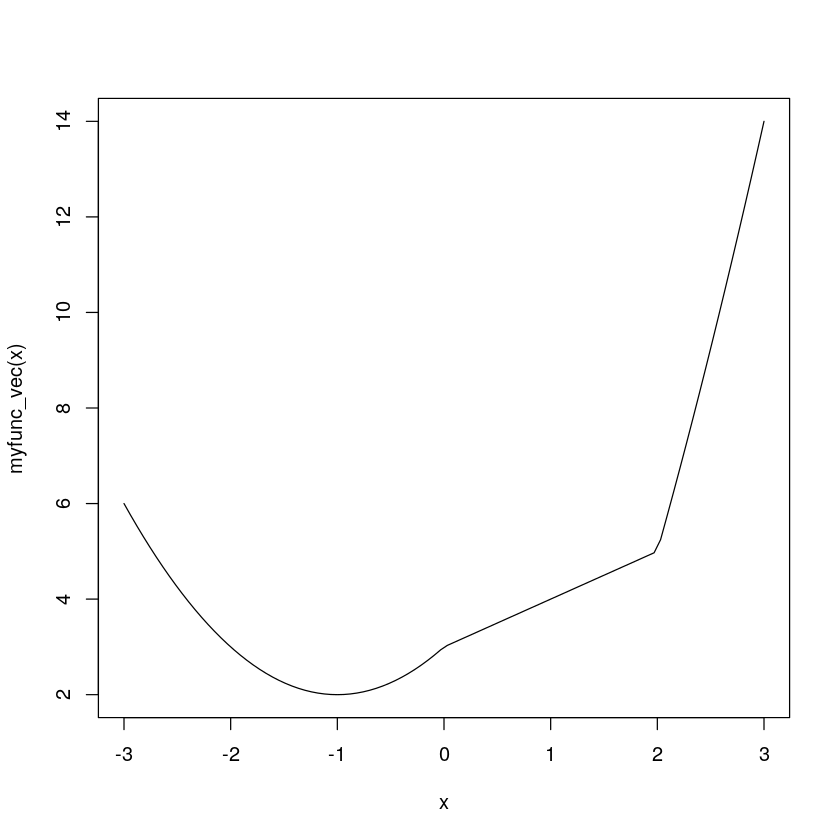

In [62]:
x <- seq(-3,3,length.out = 100)
plot(x, myfunc_vec(x), type="l")

The same can also be achieved by wrapping `sapply` around the function defined in (a).

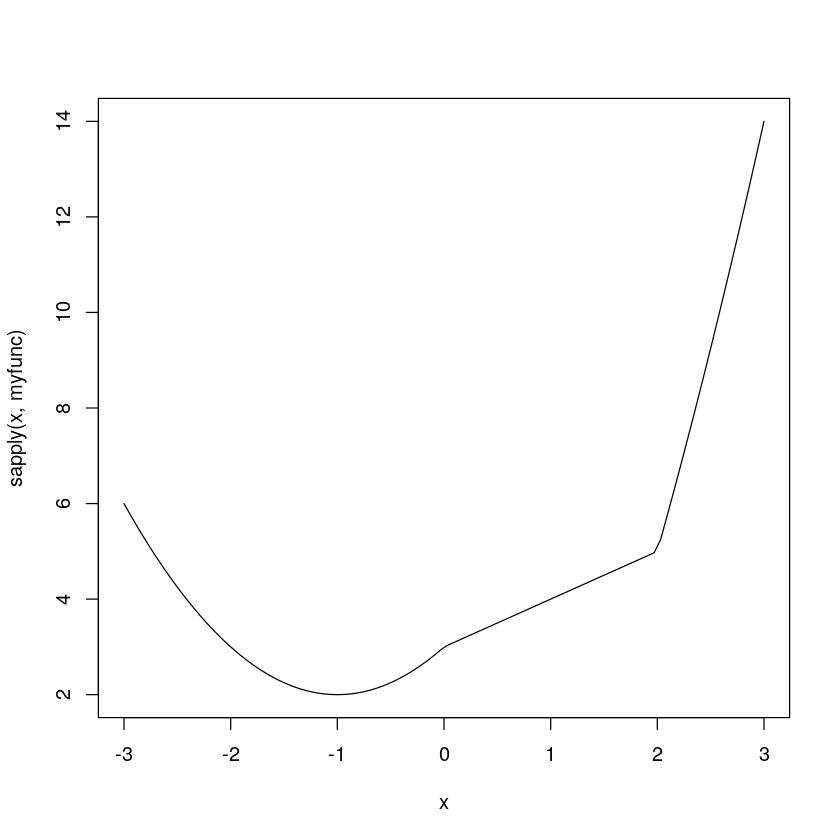

In [63]:
plot(x, sapply(x,myfunc), type="l")

# Exercises

A particular homework is graded with A, B, C, or D according to the following scheme:

|Grade|Score|
|-----|-----|
| A | 81-100|
| B | 61-80 |
| C | 41-60 |
| D | 0-40 |

Write an R program that reads the score from the user and prints the corresponding grade.

------------

A bank has a variable interest rate depending on the account balance. The interest rate is 20% for balances less than 10,000 TL, 22% for balances up to 100,000 TL, and 25% for higher balances. 

Write a function named `interest` that takes the current balance as its parameter, and returns the interest due according to this scheme.

-----------

(a) Write R code to do the following:

* The variable `x` holds a random number between -1 and 1, drawn from a uniform distribution.
* If `x` is positive, the variable `y` holds a random number drawn from a normal distribution with mean 0 and standard deviation 1.
* If `x` is zero or negative, the variable `y` holds a random number drawn from a normal distribution with mean 1 and standard deviation 0.5.

(b) Write R code to do the following:
* The variable `x` holds a vector of 100 random numbers between -1 and 1, drawn from a uniform distribution.
* The variable `y` holds 100 random numbers depending on elements in `x` according to the rule given in part (a).
-----